<a href="https://colab.research.google.com/github/Nepalijack/Machine-learning/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# data size
print(f'The dataset contains {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset contains 303 rows, and 14 columns


In [ ]:
# Always good to check the names of the columns
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# and check the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# for every column
for i in df.columns:
  # print how many features it has
  print(i,len(df[i].unique()))


age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [ ]:
# print these unique values for columns that have less than 10 unique values
# for every column
for i in df.columns:
  # print how many features it has
  if len(df[i].unique())<10:
    print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')

sex has 2 unique values, These are: [1 0]
cp has 4 unique values, These are: [3 2 1 0]
fbs has 2 unique values, These are: [1 0]
restecg has 3 unique values, These are: [0 1 2]
exang has 2 unique values, These are: [0 1]
slope has 3 unique values, These are: [0 2 1]
ca has 5 unique values, These are: [0 2 1 3 4]
thal has 4 unique values, These are: [1 2 3 0]
target has 2 unique values, These are: [1 0]


In [ ]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# number of rows of people in the dataset with age<47
n = df[df.age<=47].shape[0]
# print the percentage of those
print ('Percentage of people under the age of 42 is ', round(n/df.shape[0],2)*100)

Percentage of people under the age of 42 is  25.0


In [ ]:
# similarily for the 50% percentile
# number of rows of people in the dataset with age<55
n = df[df.age<=55].shape[0]
# print the percentage of those
print ('Percentage of people under the age of 49 is ', round(n/df.shape[0],2))

Percentage of people under the age of 49 is  0.5


In [ ]:
df.quantile([.1, .25, .5, .75], axis = 0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0.10,42.0,0.0,0.0,110.0,188.0,0.0,0.0,116.0,0.0,0.0,1.0,0.0,2.0,0.0
0.25,47.5,0.0,0.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,0.0,2.0,0.0
0.50,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
0.75,61.0,1.0,2.0,140.0,274.5,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1    165
0    138
Name: target, dtype: int64

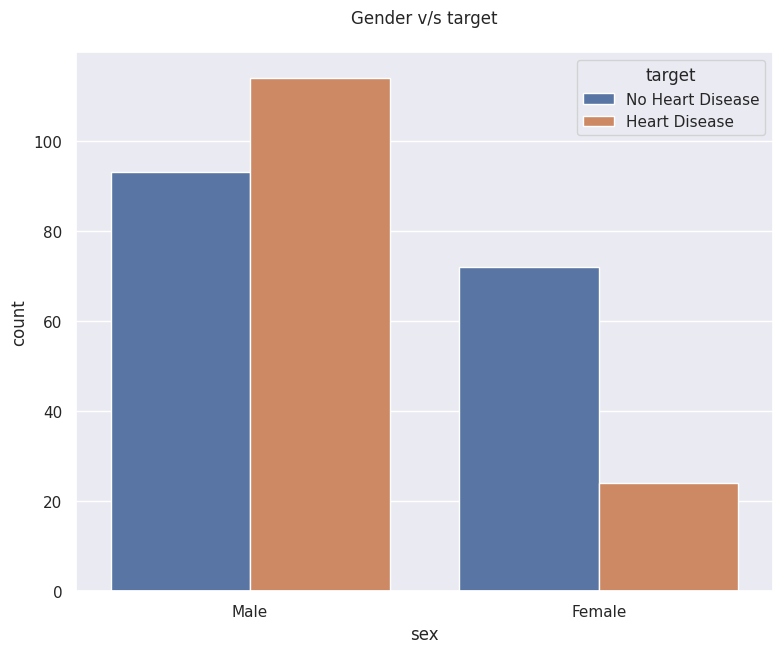

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
# first we make a copy of the dataset to decode the variables (for visualisation purposes)
dfC = df.copy()
# simple function to change sex values
def changeS(sex):
  if sex == 0:
    return 'Female'
  else:
    return 'Male'
# apply the above function to the whole column in the dataset
dfC['sex'] = dfC['sex'].apply(changeS)
# function to change taget
def changeT(label):
  if label == 0:
    return 'Heart Disease'
  else:
    return 'No Heart Disease'
dfC['target'] = dfC['target'].apply(changeT)

sns.set(rc={'figure.figsize':(9,7)})
sns.countplot(data= dfC, x='sex',hue='target')
plt.title('Gender v/s target\n')
plt.show()

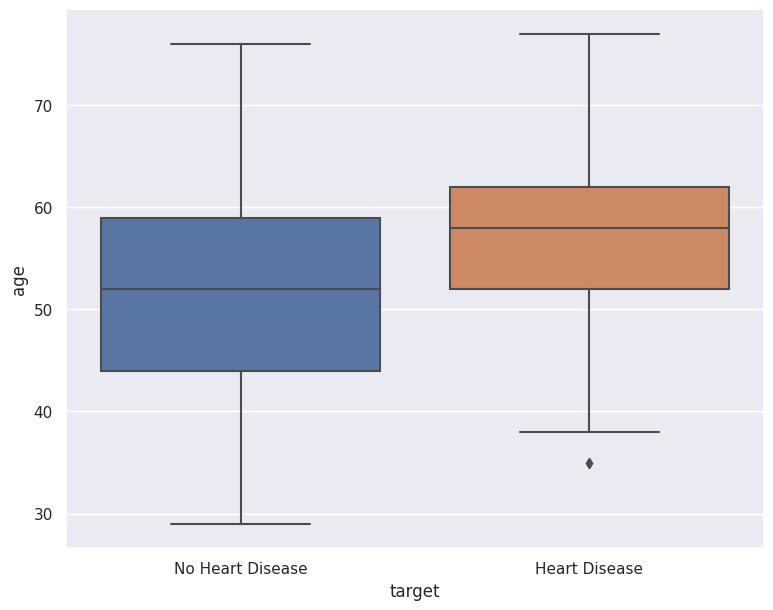

In [ ]:
sns.boxplot(data=dfC,x='target',y='age')
plt.show()


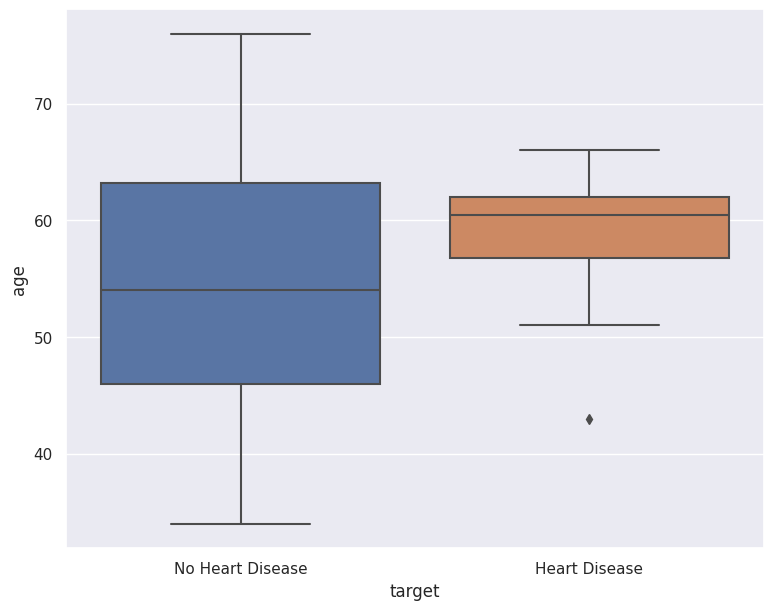

In [ ]:
# you could always add condition to your code to explore specific category of patients (i.e. females)
sns.boxplot(data=dfC[dfC.sex=='Female'],x='target',y='age')
plt.show()


In [ ]:
patients_with_disease = len(df[df.target==1])
patients_no_disease = len(df[df.target==0])
print(f'Percentage of Patients with Heart Conditions is␣{round(patients_with_disease/df.shape[0]*100,2)}' )
print(f'Percentage of Patients with no Heart Conditions is␣{round(patients_no_disease/df.shape[0]*100,2)}' )


Percentage of Patients with Heart Conditions is␣54.46
Percentage of Patients with no Heart Conditions is␣45.54


In [ ]:
df.groupby('target').mean()
# you can also group by more than one variable as below
df.groupby(['sex','target']).mean()
# or condition and then group by.
df[df.sex==0].groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,59.041667,0.0,0.166667,146.125000,274.958333,0.250000,0.541667,142.416667,0.583333,1.841667,0.958333,1.291667,2.5
1,54.555556,0.0,1.333333,128.736111,256.750000,0.083333,0.583333,154.027778,0.111111,0.554167,1.583333,0.305556,2.0


In [ ]:
# average age of men with disease?
df[(df.sex==1) &(df.target==1)].groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
1,50.903226,1.0,1.408602,129.741935,230.989247,0.182796,0.602151,161.903226,0.16129,0.605376,1.602151,0.408602,2.215054


In [ ]:
# show few values of the above four columns
df[['cp','thal','slope','restecg']].head()


,cp,thal,slope,restecg
0,3,1,0,0
1,2,2,0,1
2,1,2,2,0
3,1,2,2,1
4,0,2,2,1


In [ ]:
# now lets check the unique values of these categorical variables
cat_variables = ['cp','thal','slope','restecg']
for i in cat_variables:
  # print how many features it has
  print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')

cp has 4 unique values, These are: [3 2 1 0]
thal has 4 unique values, These are: [1 2 3 0]
slope has 3 unique values, These are: [0 2 1]
restecg has 3 unique values, These are: [0 1 2]


In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['slope'], prefix = "restecg")


In [ ]:
type(a)
a.head()


,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [ ]:
df = df.drop(cat_variables, axis = 1)


In [ ]:
# combine all data frames
df_tmp = [df, a, b, c,d]
df = pd.concat(df_tmp, axis = 1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,1,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,0,1,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df.isnull().sum()


age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           0
target       0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
slope_0      0
slope_1      0
slope_2      0
restecg_0    0
restecg_1    0
restecg_2    0
dtype: int64

In [ ]:
# Compute the mean for fbs
fbs_mean = round(df['fbs'].mean())
# assign the mean to the missing values
df['fbs'].fillna(fbs_mean, inplace = True)

In [ ]:
# store the input features
X = df.drop('target', axis = 1)
# store the label column into y variable
y = df['target']

print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
# notice that you can change the parameters of the model
lg_model = LogisticRegression(solver='lbfgs',max_iter=3000)
lg_model.fit(X_train,y_train)


LogisticRegression(max_iter=3000)

In [ ]:
# predicted values
y_pred = lg_model.predict(X_test)
# actual values
actual = y_test
# create a dictionary and a data frame and check correct predictions
dic = {'Actual':actual,'Prediction':y_pred,'correct_prediction':0}
result = pd.DataFrame(dic)
# update the correct_prediction values to 1, if correct prediction
def myfunc(x,y):
  if x == y:
    return 1
  else:
    return 0
result['correct_prediction'] = result.apply(lambda x: myfunc(x.Actual, x.Prediction), axis=1)
result[result.correct_prediction==0]


,Actual,Prediction,correct_prediction
228,0,1,0
52,1,0,0
97,1,0,0
194,0,1,0
241,0,1,0
92,1,0,0
188,0,1,0
302,0,1,0


In [ ]:
 print(f'Model Accuracy on Test Data is {len(result[result.correct_prediction==1])/len(result)}')


Model Accuracy on Test Data is 0.8688524590163934


In [45]:
 # you can save the dataframe of the results for further inspection
result.to_csv('test.csv')


In [46]:
from sklearn.metrics import accuracy_score
print(f'The Model Accuracy on Testing Set is␣{round(accuracy_score(y_test,y_pred),2)}')


The Model Accuracy on Testing Set is␣0.87


In [47]:
 from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[22  5]
 [ 3 31]]


(0.0, 2.0)

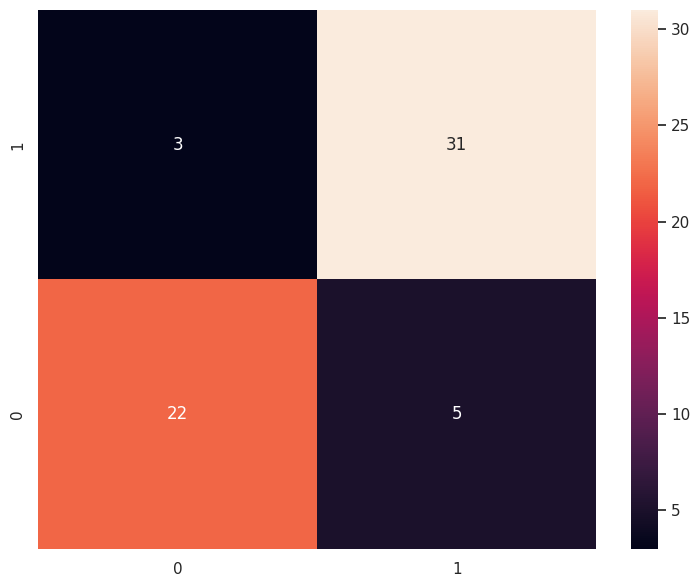

In [49]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
ax.set_ylim([0,2])

In [50]:
import pickle
# Save to file in the current working directory
pkl_filename = "pickle_lr_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
    pickle.dump(lg_model, file)
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
# Lets test the mode loaded from a file and check results
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 86.89 %
